Importing all the Required Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes =True)
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Importing the Dataset

In [4]:
data = pd.read_csv("data/diabetes.csv")

Preview of Dataset

In [5]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35,125,33.6,0.627,50,1
1,1,85.0,66.000000,29,125,26.6,0.351,31,0
2,8,183.0,64.000000,29,125,23.3,0.672,32,1
3,1,89.0,66.000000,23,94,28.1,0.167,21,0
4,0,137.0,40.000000,35,168,43.1,2.288,33,1
5,5,116.0,74.000000,29,125,25.6,0.201,30,0
6,3,78.0,50.000000,32,88,31.0,0.248,26,1
7,10,115.0,72.405184,29,125,35.3,0.134,29,0
8,2,197.0,70.000000,45,543,30.5,0.158,53,1
9,8,125.0,96.000000,29,125,32.3,0.232,54,1


In [6]:
data.shape

(768, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


**EDA**

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


**Removal of Zeros**\
\
Since there are many zeros in data and values of 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' cannot be zero,
Therefore, Converiting Zeros into NaN value

In [9]:
data_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [10]:
data[data_zeros] = np.where((data[data_zeros] == 0), np.nan, data[data_zeros])

In [11]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Handling Missing Values**\
\
Filling NaN values with suitable mean and median values

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


In [13]:
data['Glucose'] = data['Glucose'].fillna(data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].median())
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())
data['BMI'] = data['BMI'].fillna(data['BMI'].median())

In [14]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.000000,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.000000,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.000000,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.000000,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.000000,29.0,125.0,32.3,0.232,54,1


NEW UPDATED DATASET

In [15]:
data.to_csv(r'updates_dataset.csv')

**Pair Plot to see Distribution of all data at a time and dependencies**

**Heat Map**\
\
Gives Relation of different attribute with each other

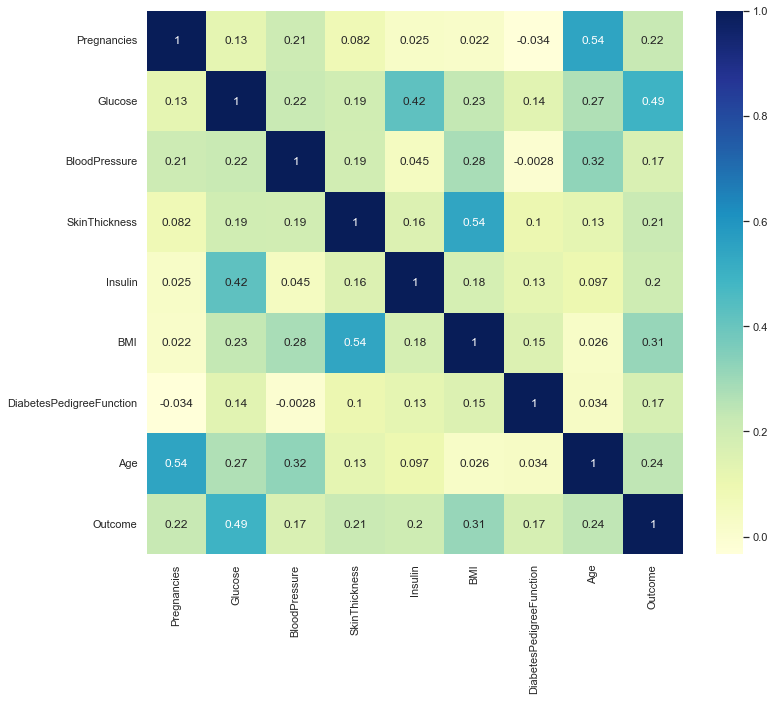

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")
plt.show()

PLOTTING HISTOGRAM AND BOX PLOT FOR ALL ATRRIBUTES